<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING THE NECESSARY LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from scipy import stats

# IMPORTING THE DATASET

In [59]:
data=pd.read_csv('/content/Invistico_Airline.csv')
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


#Checking for null values

In [60]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [61]:
#dropping the null values
new_data=data.dropna()
new_data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#Converting categorical values to numerical values using label encoder

In [62]:
#Finding the categorical variables from the table
def check_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            categorical_columns.append(column)
    return categorical_columns


categorical_columns = check_categorical_columns(new_data)
categorical_columns

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [63]:
#Finding the numerical  variables from the table
def check_num_columns(df):
    num_columns = []
    for column in df.columns:
        if df[column].dtype == 'int':
            num_columns.append(column)
    return num_columns


numcon_columns = check_num_columns(new_data)
numcon_columns

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes']

In [65]:
#applying Label encoding
le=LabelEncoder()
for column in categorical_columns:
  new_data[column]=le.fit_transform(new_data[column])
new_data
#converting the float values to int
new_data[numcon_columns]=new_data[numcon_columns].astype(int)

new_data

<ipython-input-65-44e355d6ea65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column]=le.fit_transform(new_data[column])
<ipython-input-65-44e355d6ea65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column]=le.fit_transform(new_data[column])
<ipython-input-65-44e355d6ea65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


#Binning

In [66]:
bins = [0, 8, 14, 18, 25, 35, 45, 55, 65, 100]
new_data['Age_class'] = pd.cut(new_data['Age'], bins=bins, labels=['0-8', '8-14', '14-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

new_data

<ipython-input-66-b8d520d6ba9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Age_class'] = pd.cut(new_data['Age'], bins=bins, labels=['0-8', '8-14', '14-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+'])


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age_class
0,1,0,0,65,1,1,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,55-65
1,1,1,0,47,1,0,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,45-55
2,1,0,0,15,1,1,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,14-18
3,1,0,0,60,1,1,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,55-65
4,1,0,0,70,1,1,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,3,3,4,4,4,2,0,0.0,25-35
129876,0,1,1,63,1,0,2087,2,3,2,...,3,2,3,3,1,2,1,174,172.0,55-65
129877,0,1,1,69,1,1,2320,3,0,3,...,4,4,3,4,2,3,2,155,163.0,65+
129878,0,1,1,66,1,1,2450,3,2,3,...,3,3,2,3,2,1,2,193,205.0,65+


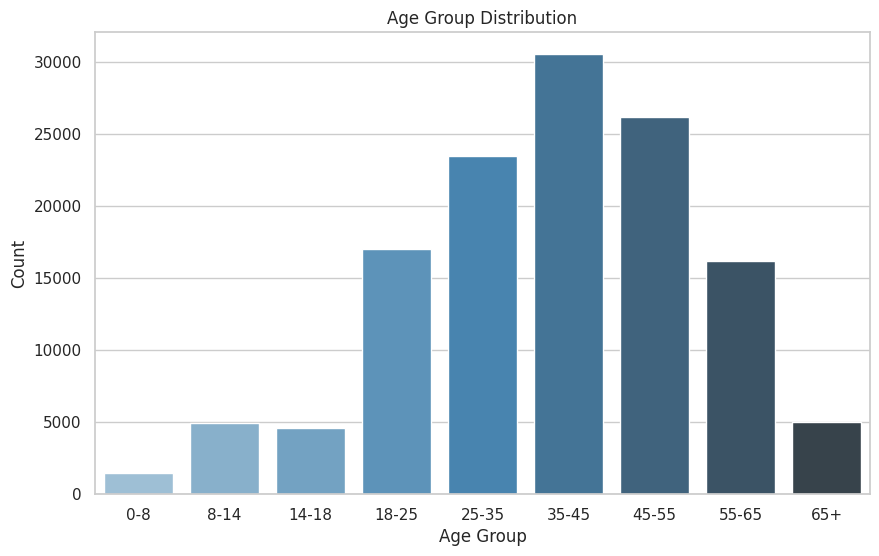

In [68]:
#finding the count of each age category
age_cat_count = new_data['Age_class'].value_counts().sort_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cat_count.index, y=age_cat_count.values, palette="Blues_d")

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")

plt.show()

#Inference from the graph
Based on the above  graph, it is evident that the predominant age group among the airline's customer base falls within the range of 35 to 45 years.

#Chi-square test

In [14]:
contingency_table = pd.crosstab(new_data["Age_class"], new_data["satisfaction"])
print(contingency_table)

chi_square_statistic, p_value, df_value, expected_values = chi2_contingency(contingency_table)
print(chi_square_statistic, p_value)

if p_value < 0.05:
  print("There is a significant relationship between age_class and satisfaction")
else:
  print("There is no significant relationship between age_class and satisfaction")

satisfaction      0      1
Age_class                 
0-8             841    634
8-14           2842   2116
14-18          2603   1996
18-25          9403   7654
25-35         12351  11135
35-45         12440  18104
45-55          8758  17403
55-65          6446   9728
65+            2921   2112
4033.1190335246506 0.0
There is a significant relationship between age_class and satisfaction


<Figure size 1000x600 with 0 Axes>

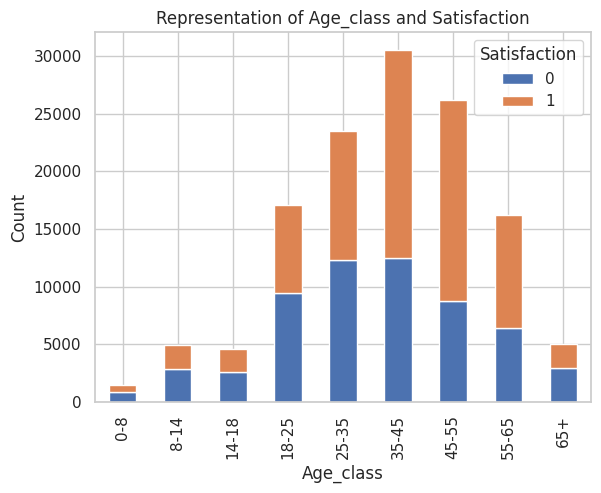

In [15]:
plt.figure(figsize=(10, 6))
contingency_table.plot(kind="bar", stacked=True)
plt.title("Representation of Age_class and Satisfaction")
plt.xlabel("Age_class")
plt.ylabel("Count")
plt.legend(title="Satisfaction", loc="upper right")
plt.show()

#Inference from chi square test

From the above test and graph we can observe that chi-sqaure test yielded a very small p-value(1.9320283159876996e-117).This tells us  that there is a  significant relationship between Age_class and satisfaction.The graph shows the distribution of satisfaction responses varies across different Age_class groups.From the graph we can observe that the age class between 35-45 and 45-55 shows maximum satisfaction.  





# Covariance Matrix to explore the relationships between Age

In [16]:
col_sel=['Age','Ease of Online booking']
sel_data=new_data[col_sel]
covariance_matrix = sel_data.cov()
print(covariance_matrix)

                               Age  Ease of Online booking
Age                     228.541731                1.415702
Ease of Online booking    1.415702                1.704520


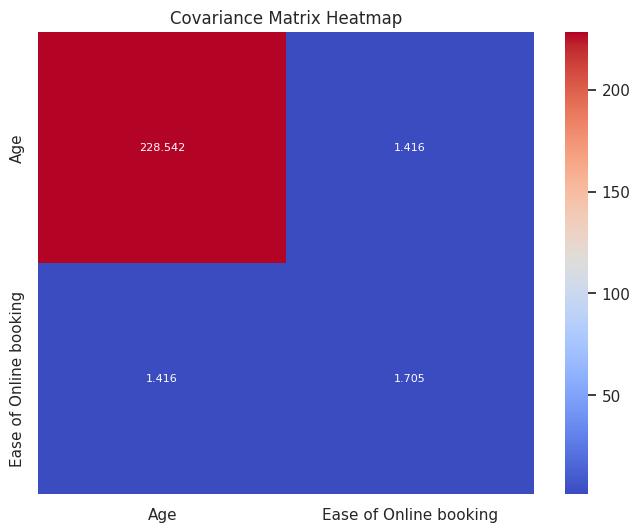

In [17]:
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title("Covariance Matrix Heatmap")
plt.show()

# Inference of the Covariance matrix
From the above heatmap we can observe that the there exists a positive covariance between Age and Ease Of online booking.This means that they vary directly  or in other words as the customer's age increases they find it easy  to book the tickets online.

#Independent T-test


In [19]:
high_rating_class = new_data[new_data['Ease of Online booking'] >=3]
low_rating_class= new_data[new_data['Ease of Online booking'] < 3]
t_statistic, p_value = stats.ttest_ind(high_rating_class['Ease of Online booking'], low_rating_class['Ease of Online booking'])
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 569.2900218946312
p-value: 0.0


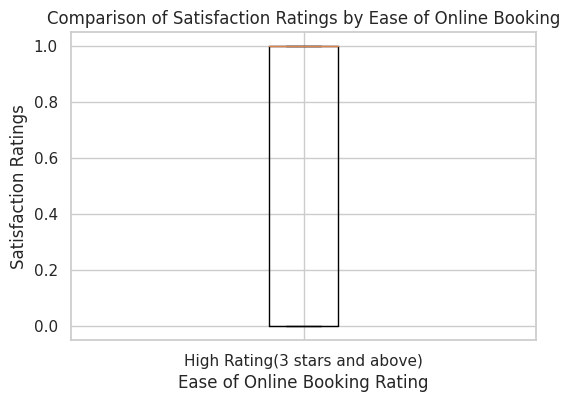

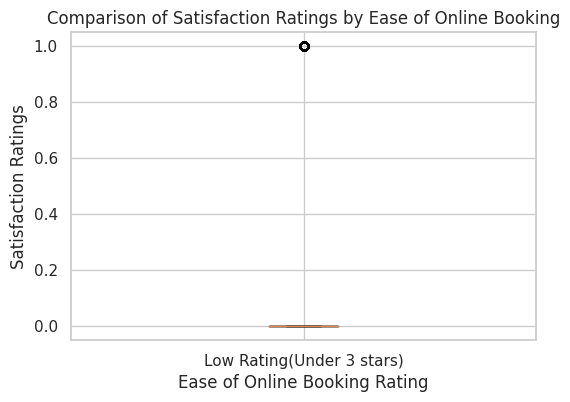

In [28]:
plt.figure(figsize=(6, 4))
plt.boxplot([high_rating_class['satisfaction']], labels=['High Rating(3 stars and above)'])
plt.title('Comparison of Satisfaction Ratings by Ease of Online Booking')
plt.ylabel('Satisfaction Ratings')
plt.xlabel('Ease of Online Booking Rating')
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))
plt.boxplot([low_rating_class['satisfaction']], labels=['Low Rating(Under 3 stars)'])
plt.title('Comparison of Satisfaction Ratings by Ease of Online Booking')
plt.ylabel('Satisfaction Ratings')
plt.xlabel('Ease of Online Booking Rating')
plt.grid(True)
plt.show()

# Inference from box plot
The above graphs show the comparison between the 2 groups of customers i.e one's who gave a low rating for ease of online booking (V/S satisfaction)  and one's who gave a high rating for ease of online booking(V/S satisfaction) .From the graphs we can observe that the customers who found the online booking procedure easy were satisfied by the overall service provided by the airlines whereas the customers who founbd it difficult were not satisfied with the service provided by the airline.